In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(40)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    duration_of_task=[1,2,3,4,5,6,7,8,9,10]
    priorities_of_task = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_eff = [0.5,0.5,0.5,0.5,0.5]
    return duration_of_task, priorities_of_task, robot_eff

In [3]:
def fitness_function(population, duration_of_task, priorities_of_task, robot_eff):
    fitness =[] #initialize
    total_robot = len(robot_eff) #Calculates the total number of robots
    for i in range(len(population)):
        present_population = population[i]
        Tr = np.zeros(total_robot, dtype=int) #Initializes a NumPy array
        for j in range(len(present_population)):
            task = j
            robot = present_population[task]
            Task = duration_of_task[task]       #Retrieves the duration of the current task.
            priority = priorities_of_task[task]  #Retrieves the priority of the current task.
            effen = robot_eff[robot] #Retrieves the efficiency of the robot
            Tr[robot] = Tr[robot] + ((Task * priority) / effen) #Fitness function formula
        Ttotal = np.max(Tr) #Calculates the maximum time taken by any robot to complete tasks.
        B = np.std(Tr)      #Standard deviation
        fitness.append(1/(Ttotal + B))
    return fitness

In [4]:
def select_parents(population, fitness):
    number_parents = int(len(population)/2) #Calculates the number of parents
    parents = []

    for _ in range(number_parents):
        max_fitness_idx = np.argmax(fitness) #Finds the highest fitness value in the fitness list (individual).
        parents.append(population[max_fitness_idx])
        fitness[max_fitness_idx] = -np.inf  # so this individual is not selected again. Set the value ti - infinity

    return parents

In [5]:
def crossover(parents, number_offspring):
    # Single point crossover
    offspring = []
    for _ in range(number_offspring):
        crossover_point = np.random.randint(1, len(parents[0]))   #Generates a random crossover point. between 1 and 1st parent
        parent1_idx = np.random.randint(0, len(parents))
        parent2_idx = np.random.randint(0, len(parents))          #Randomly selects two indices to choose two parent
        offspring_part1 = parents[parent1_idx][0:crossover_point] #Splits the values of the selected parent individuals
        offspring_part2 = parents[parent2_idx][crossover_point:]
        offspring2_part1 = parents[parent2_idx][0:crossover_point]#Combines the two parts of each offspring to create the complete offspring
        offspring2_part2 = parents[parent1_idx][crossover_point:]
        offspring.append(np.concatenate((offspring_part1, offspring_part2)))
        offspring.append(np.concatenate((offspring2_part1, offspring2_part2)))

    return offspring

In [6]:
def mutation(offspring, mutation_rate, robot_efficiencies):
    # Mutation changes a single value in each offspring randomly.
    for idx in range(len(offspring)):
        for _ in range(int(len(offspring[idx])*mutation_rate)):
            First_number = np.random.randint(0, len(offspring[idx]))  #Generate two random variable
            Second_number = np.random.randint(0, len(offspring[idx]))
            offspring[idx][First_number], offspring[idx][Second_number] = offspring[idx][Second_number] , offspring[idx][First_number] #Two values swap
    return offspring

In [7]:
# GA algorithm placeholder
def run_genetic_algorithm(duration_of_task, priorities_of_task, robot_eff):
    size_of_population = 50
    gen = 100
    rate_of_mutation = 0.1

    # Placeholder for the initial population generation
    population = [np.random.randint(0, len(robot_eff), size=len(duration_of_task)) for _ in range(size_of_population)]
    for _ in range(gen):
        fitness = fitness_function(population, duration_of_task, priorities_of_task, robot_eff) # Placeholder for the fitness function calculation
        parents = select_parents(population, fitness) # Placeholder for the selection process
        offspring = crossover(parents, int(size_of_population / 2 )) # Placeholder for the crossover
        population = mutation(offspring, rate_of_mutation, robot_eff) # Placeholder for the mutation operation

    best_solution = population[np.argmax(fitness)] #print(fitness[np.argmax(fitness)])

    return best_solution

In [8]:
def visualize_assignments_improved(solution, duration_of_task, priorities_of_task, robot_eff):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_eff), len(duration_of_task)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = duration_of_task[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(duration_of_task)):
        for j in range(len(robot_eff)):
            text_color = 'white' if grid[j, i] > 0 and duration_of_task[i] >= 5 else 'black'
            ax.text(i, j, f'P{priorities_of_task[i]}\n{duration_of_task[i]}H', va='center', ha='center', color=text_color)


    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(duration_of_task)))
    ax.set_yticks(np.arange(len(robot_eff)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(duration_of_task))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_eff)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

Best Solution: [2 5 5 2 5 5 2 4 3 1]


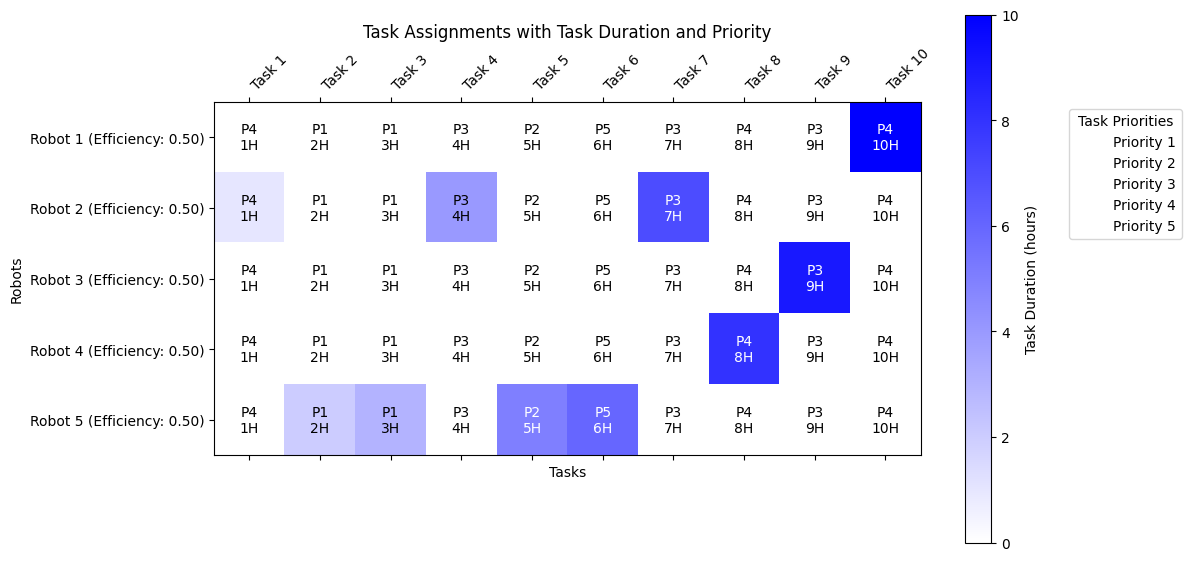

In [9]:
# Main Controlling Function
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    duration_of_task, priorities_of_task, robot_eff = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(duration_of_task, priorities_of_task, robot_eff)
    print("Best Solution:",best_solution+1)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, duration_of_task, priorities_of_task, robot_eff)